In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### (1) 데이터 가져오기

In [2]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes(as_frame=True)

In [3]:
df_x = diabetes.data
df_y = diabetes.target

In [4]:
print(df_x.shape)
print(df_y.shape)

(442, 10)
(442,)


In [5]:
df_x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


### (2)(3) 모델에 입력할 데이터 X, y 준비하기

In [6]:
X = df_x.values
y = df_y.values

### (4) train 데이터와 test 데이터로 분리하기

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(331, 10) (331,)
(111, 10) (111,)


### (5) 모델 준비하기

In [8]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

In [9]:
def model(X, W, b):
    predictions = 0
    for i in range(X_train.shape[1]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

### (6) 손실함수 loss 정의하기

In [10]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [11]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### (7) 기울기를 구하는 gradient 함수 구현하기

In [12]:
def gradient(X, W, b, y):
    N = len(y)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

### (8) 하이퍼 파라미터인 학습률 설정하기

In [13]:
LEARNING_RATE = 0.0001

### (9) 모델 학습하기

In [14]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 28370.1504
Iteration 20 : Loss 28279.3549
Iteration 30 : Loss 28188.9216
Iteration 40 : Loss 28098.8490
Iteration 50 : Loss 28009.1357
Iteration 60 : Loss 27919.7803
Iteration 70 : Loss 27830.7813
Iteration 80 : Loss 27742.1374
Iteration 90 : Loss 27653.8470
Iteration 100 : Loss 27565.9089
Iteration 110 : Loss 27478.3215
Iteration 120 : Loss 27391.0835
Iteration 130 : Loss 27304.1935
Iteration 140 : Loss 27217.6501
Iteration 150 : Loss 27131.4519
Iteration 160 : Loss 27045.5976
Iteration 170 : Loss 26960.0857
Iteration 180 : Loss 26874.9149
Iteration 190 : Loss 26790.0838
Iteration 200 : Loss 26705.5911
Iteration 210 : Loss 26621.4355
Iteration 220 : Loss 26537.6155
Iteration 230 : Loss 26454.1299
Iteration 240 : Loss 26370.9773
Iteration 250 : Loss 26288.1563
Iteration 260 : Loss 26205.6657
Iteration 270 : Loss 26123.5042
Iteration 280 : Loss 26041.6703
Iteration 290 : Loss 25960.1629
Iteration 300 : Loss 25878.9806
Iteration 310 : Loss 25798.1221
Iteration 320 : L

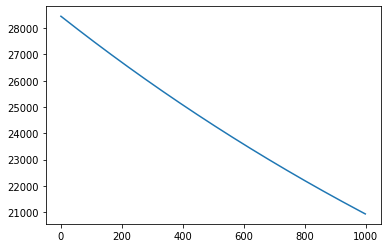

In [15]:
plt.plot(losses)
plt.show()

### (10) test 데이터에 대한 성능 확인하기

In [16]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

22665.882477895284

### (11) 정답 데이터와 예측한 데이터 시각화하기

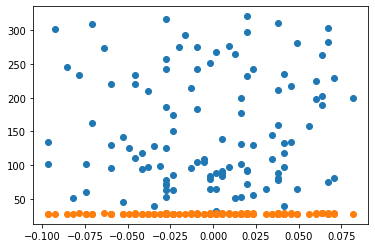

In [17]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()